<a href="https://colab.research.google.com/github/Sahil9424r/AQI_Prediction/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
print(np.__version__)

2.0.2


In [ ]:
print(sklearn.__version__)

1.6.1


In [ ]:
df=pd.read_csv('/content/city_day.csv')

# DATA PREPROCESSING (EDA)

In [ ]:
df.shape

(29531, 16)

In [ ]:
d=df.copy()

In [ ]:
d.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [ ]:
d.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


 BY GOOGLE-
Most Important Parameters for AQI (High Impact):
These directly influence AQI calculation in most countries:

PM2.5 (Fine Particulate Matter ≤ 2.5 μm)
🔹 Most critical — deeply penetrates lungs, causes severe health effects.

PM10 (Particulate Matter ≤ 10 μm)
🔹 Also important, but less harmful than PM2.5.

NO₂ (Nitrogen Dioxide)
🔹 Important in urban/traffic areas; contributes to respiratory issues.

O₃ (Ozone) (especially in warmer climates)
🔹 Plays a major role in AQI, especially in summer; causes throat/lung irritation.

CO (Carbon Monoxide)
🔹 Important in areas with heavy traffic or combustion sources.

SO₂ (Sulfur Dioxide)
🔹 Important near industrial zones; contributes to acid rain.

ALSO---
These can affect air quality, but are less commonly used directly in AQI calculation:

NO, NOx: Nitric oxide and oxides of nitrogen. Related to NO₂ but not directly used in AQI score.

NH₃ (Ammonia): Used in some advanced models, especially in agricultural areas.
These may be important for toxicology or environmental monitoring, but are not used in official AQI computation:

Benzene, Toluene, Xylene (BTX)
AQI Bucket is removed since it is categorical data and AQI Bucket can be calculated using AQI values by simple formula.

In [ ]:
d.drop(columns=['City','Date','NO','NOx','NH3','Benzene', 'Toluene', 'Xylene','PM10','AQI_Bucket'],axis=1,inplace=True)

In [ ]:
d.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,NaN,18.22,0.92,27.64,133.36,NaN
1,NaN,15.69,0.97,24.55,34.06,NaN
2,NaN,19.30,17.40,29.07,30.70,NaN
3,NaN,18.48,1.70,18.59,36.08,NaN
4,NaN,21.42,22.10,39.33,39.31,NaN


In [ ]:
d.shape

(29531, 6)

In [ ]:
d.isnull().sum()

,0
PM2.5,4598
NO2,3585
CO,2059
SO2,3854
O3,4022
AQI,4681


To ensure data quality for modeling:

We dropped rows where any of these key columns were missing.

This resulted in a cleaned dataset with ~22,000 rows.

The remaining data was sufficient for training a robust AQI prediction model.
AS every time replacing with mean,median,mode is not suitable

In [ ]:
d = d.dropna().reset_index(drop=True)

In [ ]:
d.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,514.0
3,135.99,42.08,43.48,75.23,102.70,782.0
4,178.33,35.31,54.56,55.04,107.38,914.0


In [ ]:
d.shape

(22618, 6)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22618 entries, 0 to 22617
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   22618 non-null  float64
 1   NO2     22618 non-null  float64
 2   CO      22618 non-null  float64
 3   SO2     22618 non-null  float64
 4   O3      22618 non-null  float64
 5   AQI     22618 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [ ]:
d.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000
mean,67.756028,29.718371,2.341847,13.891994,35.123085,167.385047
std,63.404533,24.503292,6.965907,16.661959,21.604953,140.384503
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,29.032500,12.880000,0.610000,5.830000,19.560000,81.000000
50%,48.855000,23.220000,0.940000,9.220000,31.625000,118.000000
75%,81.340000,39.030000,1.470000,14.707500,46.250000,211.000000
max,914.940000,362.210000,175.810000,186.080000,257.730000,1917.000000


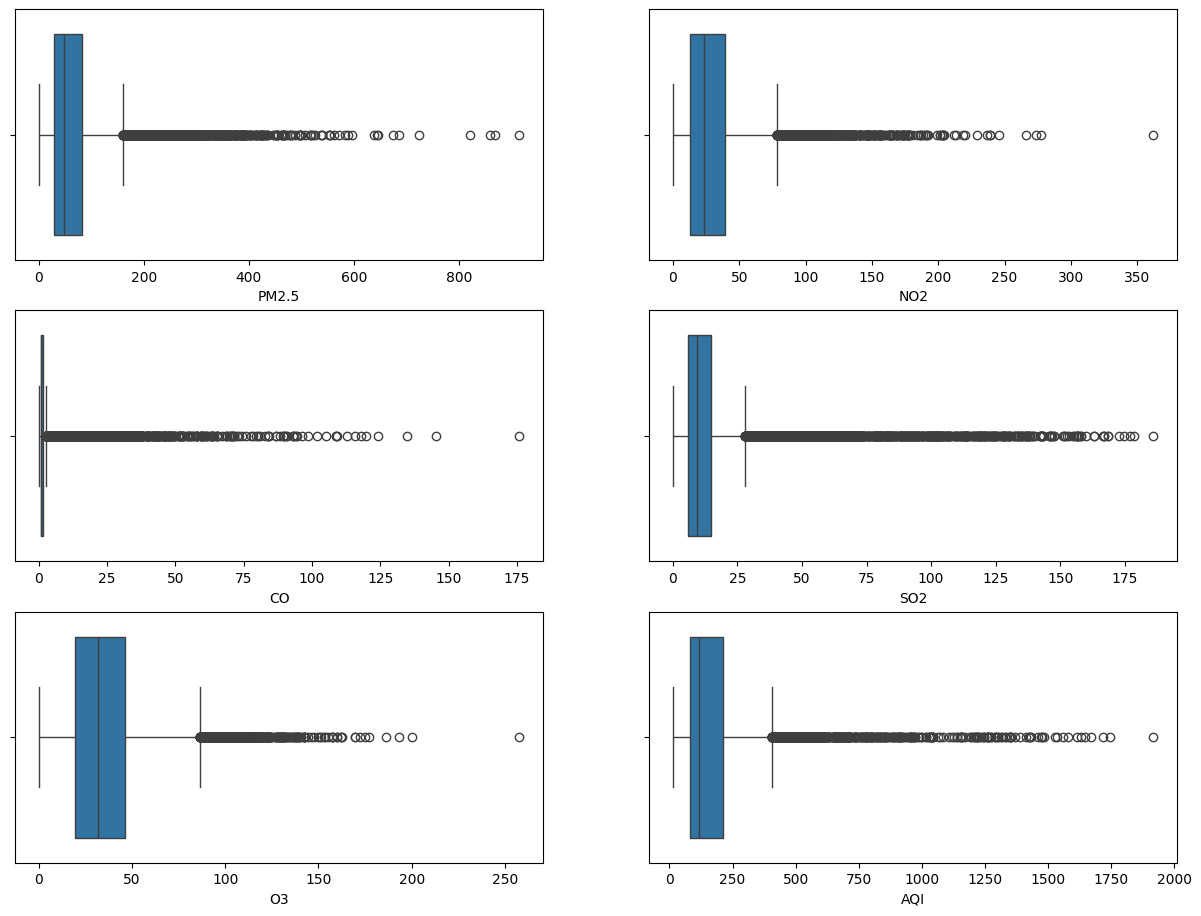

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,d.shape[1]+1):
    plt.subplot(4,2,i)
    sns.boxplot(x=d[d.columns[i-1]])

FROM DESCRIBE AND BOX PLOT--
it is clear that so much outlier is there


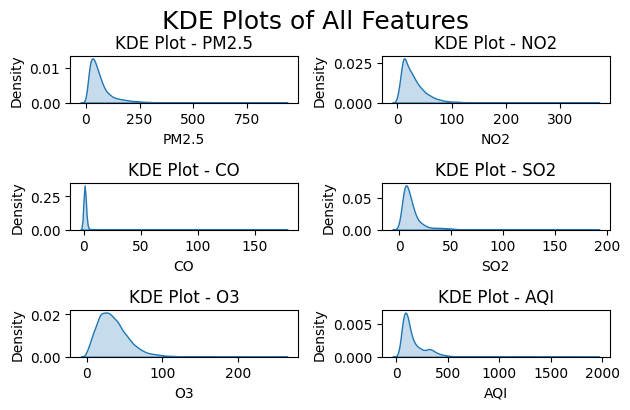

In [ ]:
cols =d.columns
for i in range(1, d.shape[1] + 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=d, x=cols[i - 1], shade=True)
    plt.title(f"KDE Plot - {cols[i - 1]}")
    plt.tight_layout()

plt.suptitle("KDE Plots of All Features", fontsize=18, y=1.02)
plt.show()

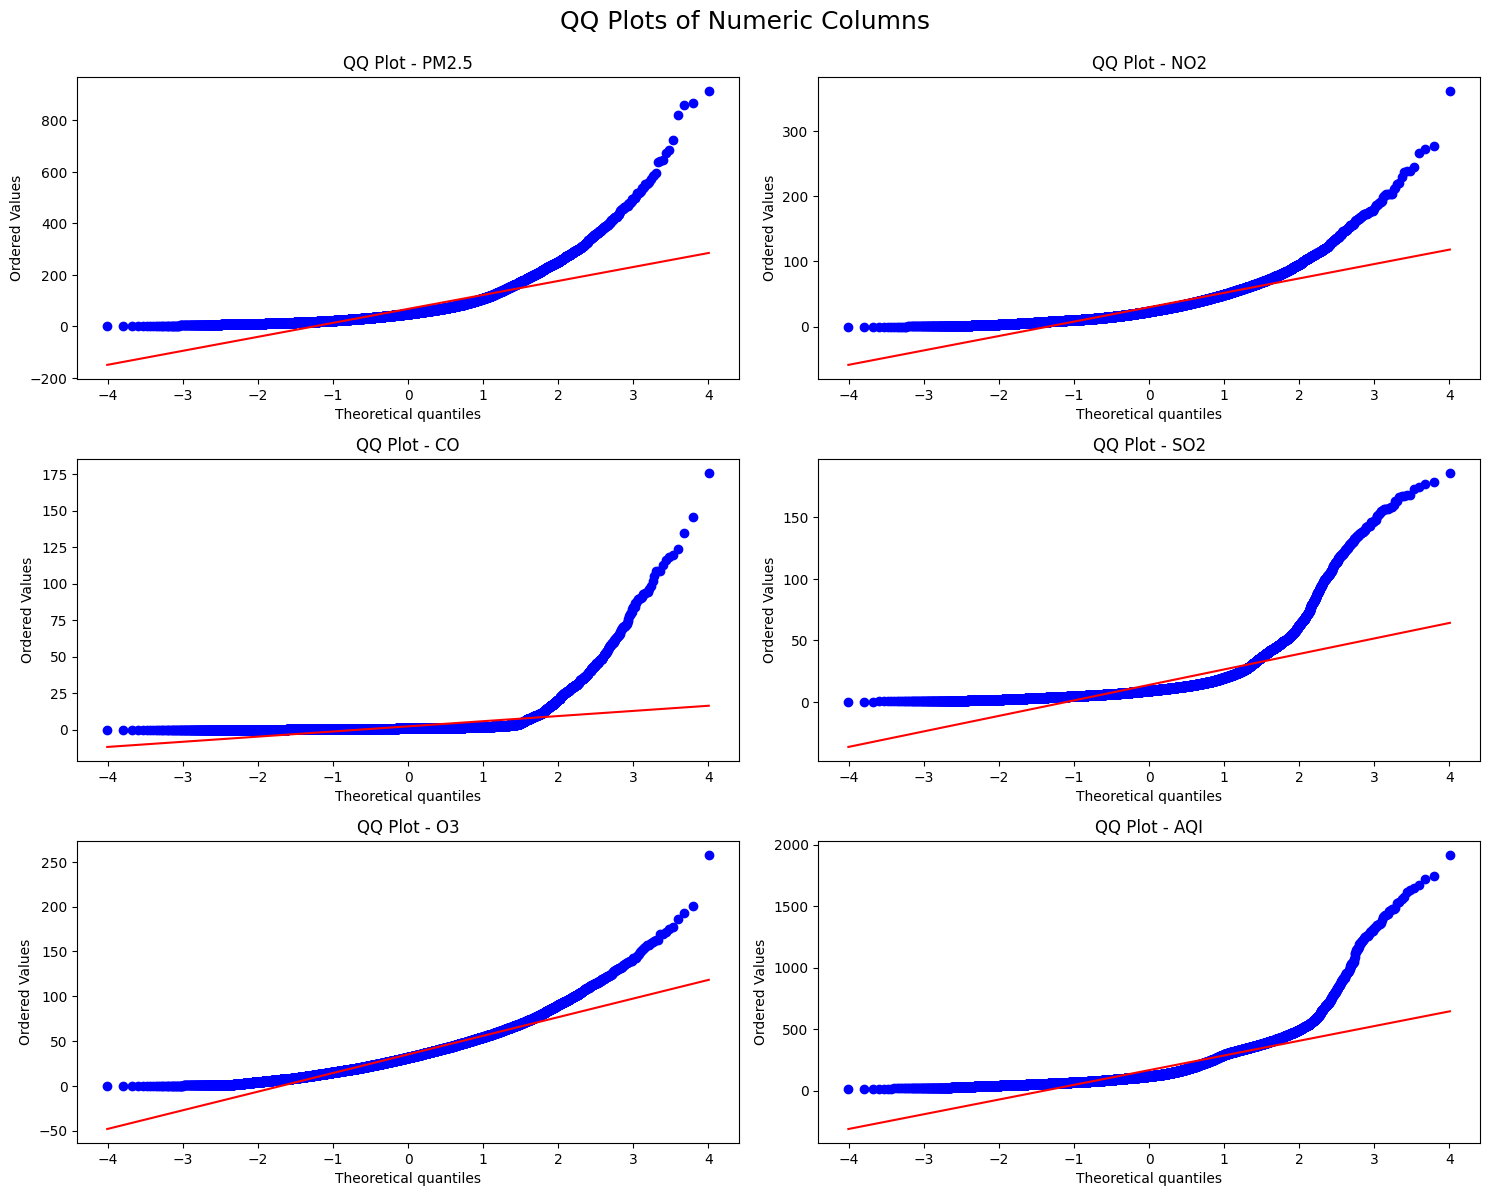

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(15, 15))

for i in range(1, len(cols) + 1):
    plt.subplot(4, 2, i)
    stats.probplot(d[cols[i - 1]].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot - {cols[i - 1]}")
    plt.tight_layout()

plt.suptitle("QQ Plots of Numeric Columns", fontsize=18, y=1.02)
plt.show()

from kdeplot and QQ plot it is clear that data not follow normal distribution because in qq plot there are diagonal curver and kdeplot is skew

REMOVE OUTLIERS BY INTER QUARTILE METHOD

In [ ]:

for col in ['PM2.5', 'NO2', 'CO', 'SO2', 'O3', 'AQI']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    d = d[(d[col] >= lower_bound) & (d[col] <= upper_bound)]


In [ ]:
d.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000
mean,49.462601,24.206079,0.893354,9.347994,32.418410,120.519040
std,31.607638,15.454485,0.520075,5.441272,17.400743,67.364881
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,25.690000,11.980000,0.550000,5.440000,19.060000,73.000000
50%,42.120000,20.720000,0.830000,8.180000,30.240000,102.000000
75%,65.220000,33.490000,1.140000,12.030000,43.570000,146.000000
max,158.210000,76.360000,2.860000,29.540000,85.630000,397.000000


AFTER REMOVING OUTLIER

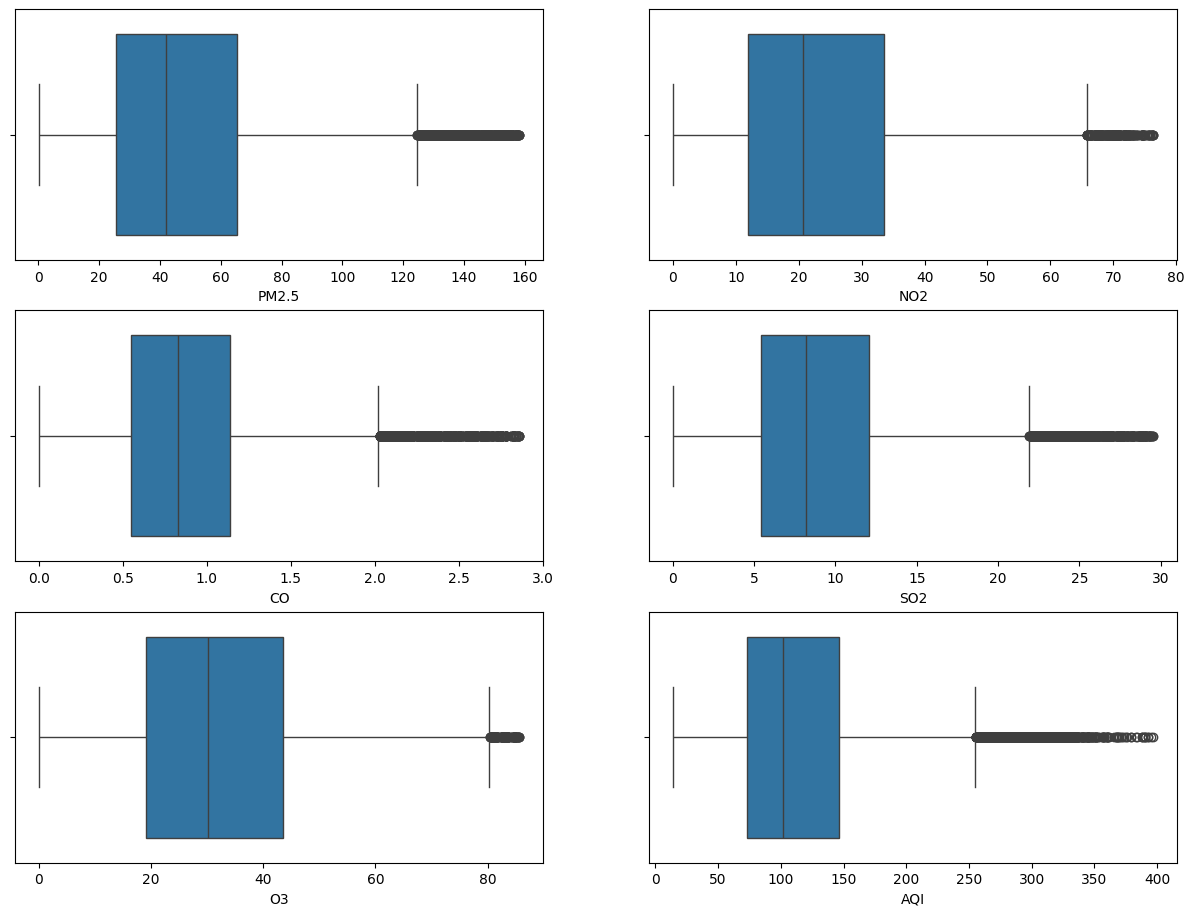

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,d.shape[1]+1):
    plt.subplot(4,2,i)
    sns.boxplot(x=d[d.columns[i-1]])

now there is very less outliers so now we cnan proceed further

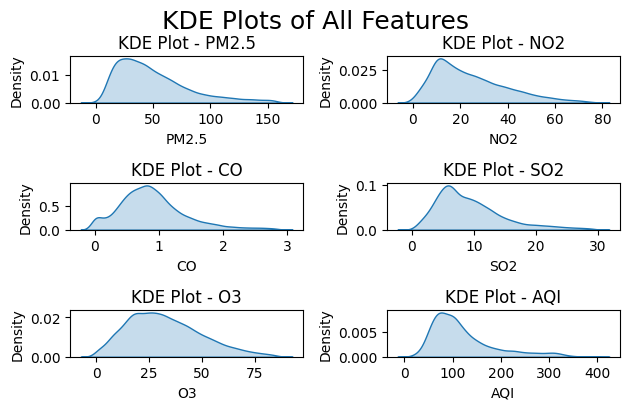

In [ ]:
cols =d.columns
for i in range(1, d.shape[1] + 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=d, x=cols[i - 1], shade=True)
    plt.title(f"KDE Plot - {cols[i - 1]}")
    plt.tight_layout()

plt.suptitle("KDE Plots of All Features", fontsize=18, y=1.02)
plt.show()

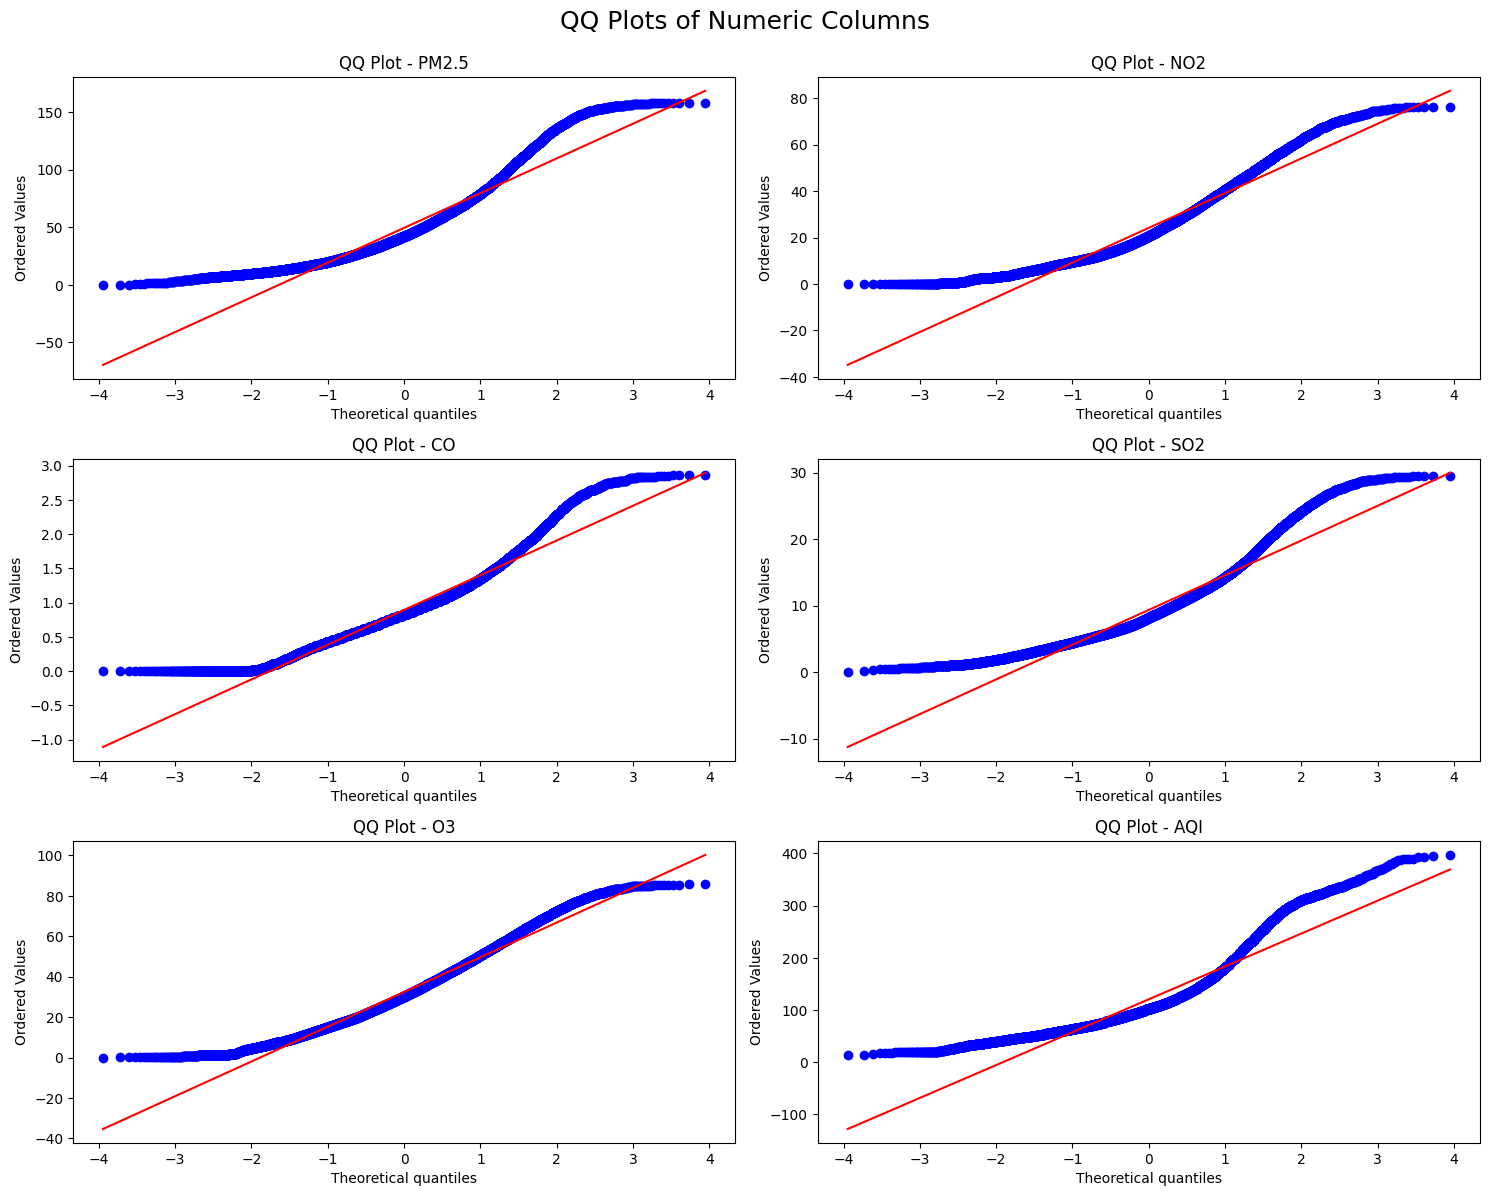

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(1, len(cols) + 1):
    plt.subplot(4, 2, i)
    stats.probplot(d[cols[i - 1]].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot - {cols[i - 1]}")
    plt.tight_layout()

plt.suptitle("QQ Plots of Numeric Columns", fontsize=18, y=1.02)
plt.show()

NOW BY KDEPLOT AND QQ PLOT WE SEE THAT DATA BECOME NORMALISED

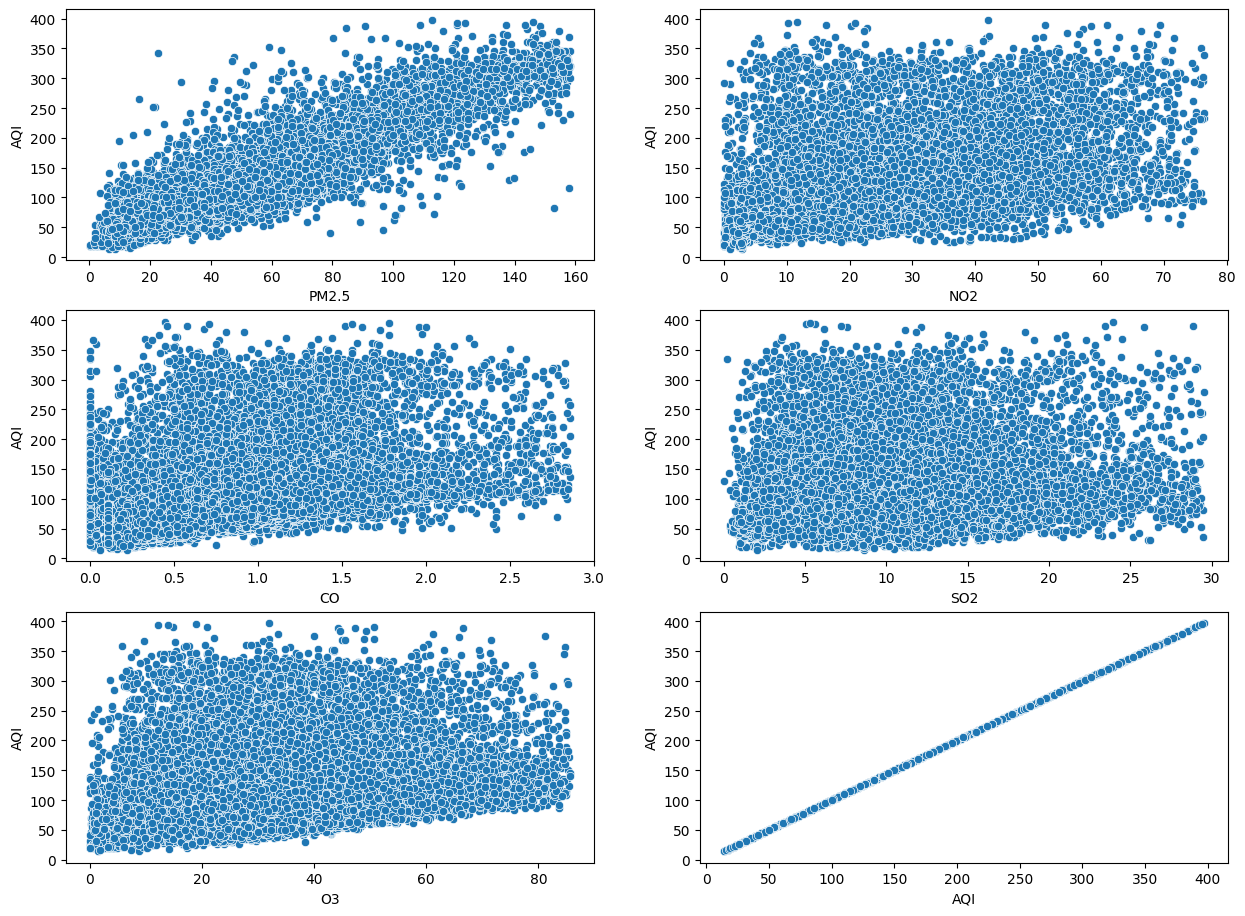

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,d.shape[1]+1):
    plt.subplot(4,2,i)
    sns.scatterplot(x=d[d.columns[i-1]],y=d.AQI)

DATA NOT CHANGING LINEARLY SO HERE I CAN'T USE LINEAR MODELS HERE MOST PROBABLY

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

tocheck feature importance

[0.81085732 0.05319443 0.05671162 0.03662874 0.04260789]


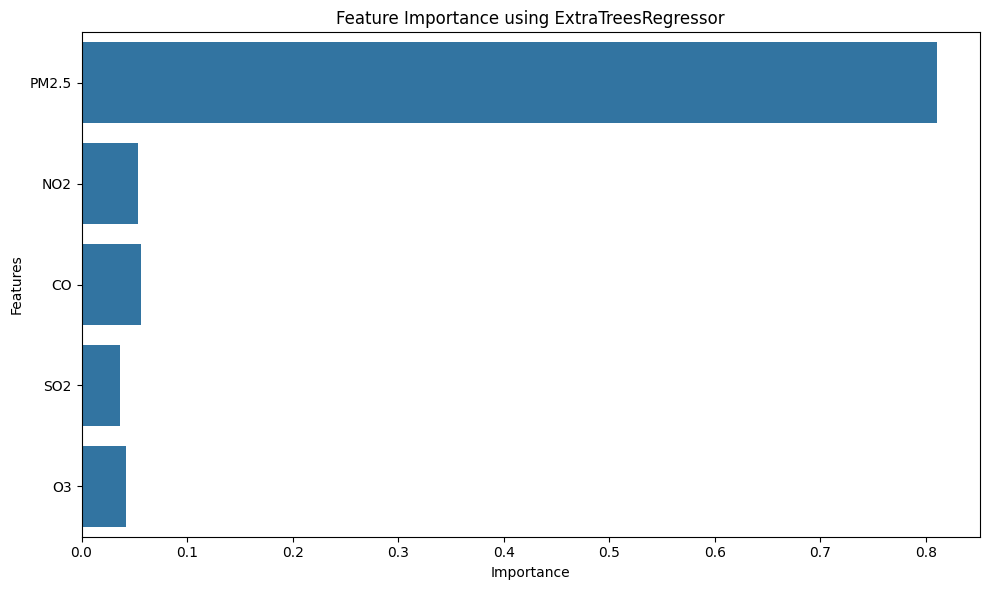

In [ ]:
X = d.drop("AQI", axis=1)
y = d["AQI"]

model = ExtraTreesRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns
print(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance using ExtraTreesRegressor")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
d.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000
mean,49.462601,24.206079,0.893354,9.347994,32.418410,120.519040
std,31.607638,15.454485,0.520075,5.441272,17.400743,67.364881
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,25.690000,11.980000,0.550000,5.440000,19.060000,73.000000
50%,42.120000,20.720000,0.830000,8.180000,30.240000,102.000000
75%,65.220000,33.490000,1.140000,12.030000,43.570000,146.000000
max,158.210000,76.360000,2.860000,29.540000,85.630000,397.000000


In [ ]:
d.corr()

,PM2.5,NO2,CO,SO2,O3,AQI
PM2.5,1.000000,0.428242,0.306582,0.183305,0.231696,0.893637
NO2,0.428242,1.000000,0.191678,0.209002,0.275357,0.416198
CO,0.306582,0.191678,1.000000,0.134628,0.035869,0.373533
SO2,0.183305,0.209002,0.134628,1.000000,0.129318,0.219185
O3,0.231696,0.275357,0.035869,0.129318,1.000000,0.250062
AQI,0.893637,0.416198,0.373533,0.219185,0.250062,1.000000


CORRELATION GRAPH

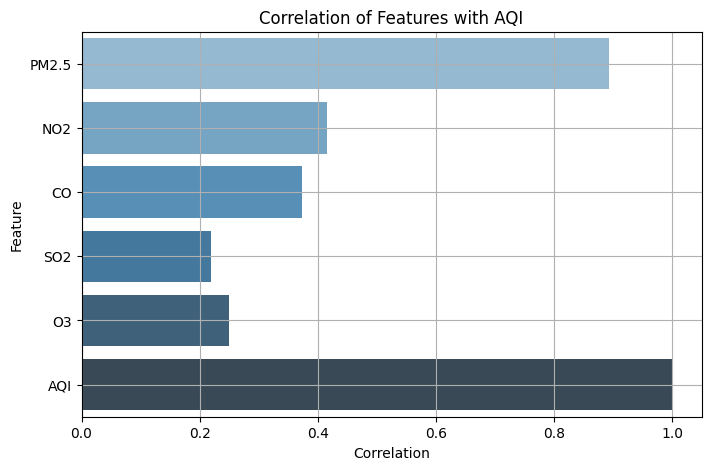

In [ ]:
corr = d.corr()['AQI'].reset_index()
corr.columns = ['Feature', 'Correlation']
plt.figure(figsize=(8, 5))
sns.barplot(x='Correlation', y='Feature', data=corr, palette='Blues_d')
plt.title('Correlation of Features with AQI')
plt.grid(True)
plt.show()

Here we saw that PM2.5 is most corelatwd to AQI and SO2 is least corelated and rest are medium corelated

In [ ]:
d.corr()

,PM2.5,NO2,CO,SO2,O3,AQI
PM2.5,1.000000,0.428242,0.306582,0.183305,0.231696,0.893637
NO2,0.428242,1.000000,0.191678,0.209002,0.275357,0.416198
CO,0.306582,0.191678,1.000000,0.134628,0.035869,0.373533
SO2,0.183305,0.209002,0.134628,1.000000,0.129318,0.219185
O3,0.231696,0.275357,0.035869,0.129318,1.000000,0.250062
AQI,0.893637,0.416198,0.373533,0.219185,0.250062,1.000000


In [ ]:
d.to_csv("cleaned_data.csv", index=False)

# TRAINING AND EXPLORING CLEANED_DATA.CSV

In [ ]:
d2=pd.read_csv("/content/cleaned_data.csv")
d2.shape

(17411, 6)

In [ ]:
d2.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,80.65,22.83,2.37,25.73,47.30,294.0
1,38.88,16.28,2.18,26.40,12.47,128.0
2,65.37,8.07,0.64,16.31,8.02,105.0
3,56.28,8.02,0.60,18.93,6.20,101.0
4,48.17,8.00,0.65,18.99,7.97,93.0


In [ ]:
d2.isnull().sum()

,0
PM2.5,0
NO2,0
CO,0
SO2,0
O3,0
AQI,0


create multiple copies of dataframe so that working is easy

In [ ]:
d2.AQI.describe()

,AQI
count,17411.000000
mean,120.519040
std,67.364881
min,14.000000
25%,73.000000
50%,102.000000
75%,146.000000
max,397.000000


In [ ]:
d1=d2.copy()
d3=d2.copy()
d4=d2.copy()

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [ ]:
x=d1.drop('AQI',axis=1)
y=d1['AQI']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model fitting without tuning

Random forest


In [ ]:
r=RandomForestRegressor()
r.fit(x_train,y_train)
pr=r.predict(x_test)
print("Training accuracy  for normal Random Forest: ",r.score(x_train,y_train))
print("Testing accuracy  for normal Random Forest: ",r.score(x_test,y_test))
print("mean sqaure error for normal Random Forest:",mean_squared_error(y_test,pr))
print("r2 score for normal Random Forest:" ,r2_score(y_test,pr))

Training accuracy  for normal Random Forest:  0.9768569357952024
Testing accuracy  for normal Random Forest:  0.8347694116853187
mean sqaure error for normal Random Forest: 755.8296241458513
r2 score for normal Random Forest: 0.8347694116853187


NORMAL RANDOM FOREST RESULT:


*   Testing accuracy=83%
*   Training accuracy =97%
*   Mean sqaure  error=755.8296241458513
*  R2 score : 0.8347694116853187
















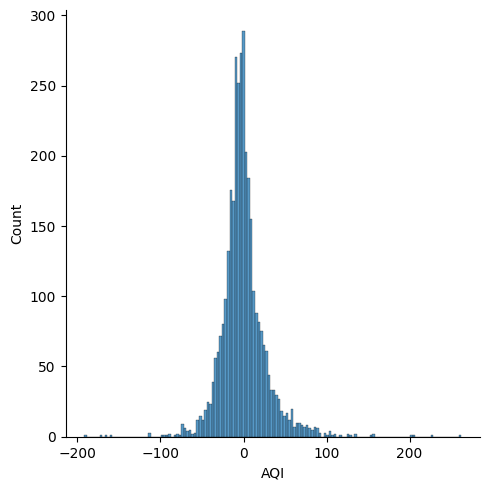

In [ ]:
sns.displot(y_test - pr)

model is performing good but there is some overfitting as training accuray=97% and testing accuracy is 83%

HYPERMATER TUNING FOR RANDOM FOREST

In [ ]:
params = {
    'n_estimators':  [int(x) for x in np.linspace(start=100, stop=1200, num=18)],
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf':[1, 2, 5, 10,12],
    'max_features': ['auto', 'sqrt', 'log2']
}
search = RandomizedSearchCV(
    r, params,cv=5, scoring='r2', random_state=42, n_jobs=-1
)
search.fit(x_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best CV Score:", search.best_score_)

Best Parameters: {'n_estimators': 552, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 20}
Best CV Score: 0.8418451762755842


In [ ]:
best_rf=RandomForestRegressor(n_estimators=552,min_samples_split=15,min_samples_leaf=5,max_features='log2',max_depth=20)
best_rf.fit(x_train,y_train)
bpr=best_rf.predict(x_test)
print("Training accuracy  for best Random Forest: ",best_rf.score(x_train,y_train))
print("Testing accuracy  for best Random Forest: ",best_rf.score(x_test,y_test))
print("mean sqaure error for best Random Forest:",mean_squared_error(y_test,bpr))
print("r2 score for best Random Forest:" ,r2_score(y_test,bpr))

Training accuracy  for best Random Forest:  0.9039175327752998
Testing accuracy  for best Random Forest:  0.8420437577421014
mean sqaure error for best Random Forest: 722.5539074514722
r2 score for best Random Forest: 0.8420437577421014


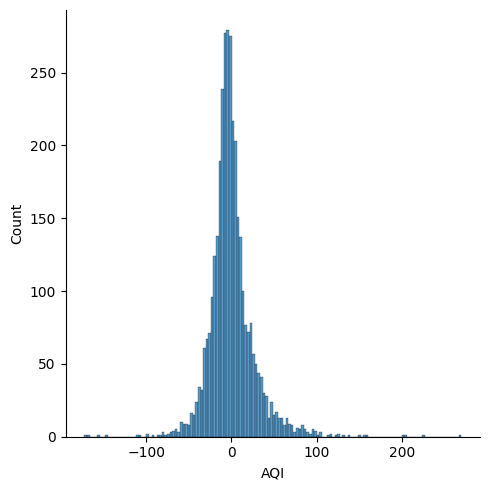

In [ ]:
sns.displot(y_test - bpr)

TUNED RANDOM FOREST RESULT:


*   Testing accuracy=84%
*   Training accuracy =90%
*   Mean sqaure  error= 722.5539074514722
*  R2 score :0.8420437577421014

IT IS BETTER THAN PREVIOUS AS OVERFITINF REDUCE AND MSE AND R2SCORE ALSO IMPOROVE


XGBOOST

In [ ]:
xgr=XGBRegressor()
xgr.fit(x_train,y_train)
xgrp=xgr.predict(x_test)
print("Training accuracy  for normal XGBoost: ",xgr.score(x_train,y_train))
print("Testing accuracy  for normal XGBoost: ",xgr.score(x_test,y_test))
print("mean sqaure error for normal XGBoost:",mean_squared_error(y_test,xgrp))
print("r2 score for normal XGBoost:" ,r2_score(y_test,xgrp))

Training accuracy  for normal XGBoost:  0.9360706704997069
Testing accuracy  for normal XGBoost:  0.8260408543054288
mean sqaure error for normal XGBoost: 795.7574747397927
r2 score for normal XGBoost: 0.8260408543054288


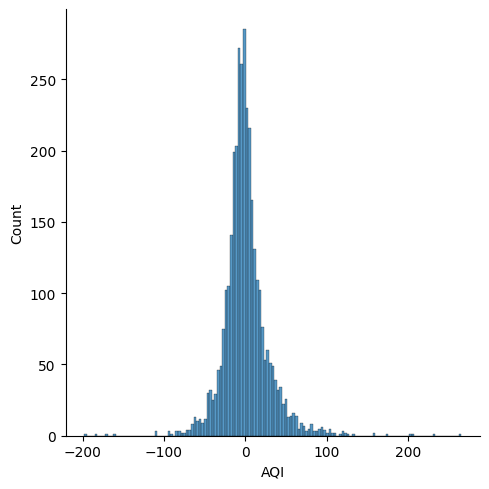

In [ ]:
sns.displot(y_test - xgrp)

little bit overfiintg also here

*   Testing accuracy=82%
*   Training accuracy =93%
*   Mean sqaure  error= 795.7
*  R2 score :0.826

TUNED XGBREGRESSOR

In [ ]:
paramx = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2.0],
     'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
}
random_search = RandomizedSearchCV(
    estimator=xgr,
    param_distributions=paramx,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'reg:tweedie', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


In [ ]:
best_xgr=XGBRegressor(subsample= 0.6, reg_lambda=1, reg_alpha= 0,objective='reg:tweedie', n_estimators=100, max_depth= 5, learning_rate= 0.1, gamma=1, colsample_bytree= 0.8, booster='gbtree')
best_xgr.fit(x_train,y_train)
best_xgrp=best_xgr.predict(x_test)
print("Training accuracy  for best XGBoost: ",best_xgr.score(x_train,y_train))
print("Testing accuracy  for best XGBoost: ",best_xgr.score(x_test,y_test))
print("mean sqaure error for best XGBoost:",mean_squared_error(y_test,best_xgrp))
print("r2 score for best XGBoost:" ,r2_score(y_test,best_xgrp))


Training accuracy  for best XGBoost:  0.8702205074700567
Testing accuracy  for best XGBoost:  0.8393635992726671
mean sqaure error for best XGBoost: 734.8140052291658
r2 score for best XGBoost: 0.8393635992726671


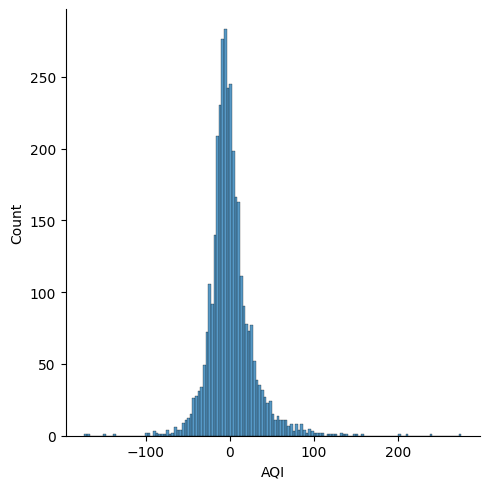

In [ ]:
sns.displot(y_test - best_xgrp)

DESCISION TREE

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtp=dt.predict(x_test)
print("Training accuracy  for normal Decision Tree: ",dt.score(x_train,y_train))
print("Testing accuracy  for normal Decision Tree: ",dt.score(x_test,y_test))
print("mean sqaure error for normal Decision Tree:",mean_squared_error(y_test,dtp))
print("r2 score for normal Decision Tree:" ,r2_score(y_test,dtp))

Training accuracy  for normal Decision Tree:  1.0
Testing accuracy  for normal Decision Tree:  0.6811041700273033
mean sqaure error for normal Decision Tree: 1458.7548090726386
r2 score for normal Decision Tree: 0.6811041700273033


TUINING OF DESICTION TREE

In [ ]:
paramd={
"splitter" : ["best", "random"] ,
"max_depth" : [1, 3, 5, 7, 9, 11, 12, 15],
"min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"min_weight_fraction_leaf":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
"max_features" : ["auto", "log2", "sqrt", None],
"max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70, 80, 90]
}

In [ ]:
rd=RandomizedSearchCV(dt,paramd,cv=5,scoring='r2',random_state=42,n_jobs=-1)
rd.fit(x_train,y_train)
print("Best Parameters:", rd.best_params_)

Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 10, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
best_dt=DecisionTreeRegressor(splitter='best',min_weight_fraction_leaf=0.3,min_samples_leaf=10,max_leaf_nodes=40,max_features='sqrt',max_depth=15)
best_dt.fit(x_train,y_train)
best_dtp=best_dt.predict(x_test)
print("Training accuracy  for best Decision Tree: ",best_dt.score(x_train,y_train))
print("Testing accuracy  for best Decision Tree: ",best_dt.score(x_test,y_test))
print("mean sqaure error for best Decision Tree:",mean_squared_error(y_test,best_dtp))
print("r2 score for best Decision Tree:" ,r2_score(y_test,best_dtp))

Training accuracy  for best Decision Tree:  0.13438112837314897
Testing accuracy  for best Decision Tree:  0.12270976656250376
mean sqaure error for best Decision Tree: 4013.0701837304523
r2 score for best Decision Tree: 0.12270976656250376


Linear regression

In [ ]:
l=LinearRegression()
l.fit(x_train,y_train)
lp=l.predict(x_test)
print("Training accuracy  for normal Linear Regression: ",l.score(x_train,y_train))
print("Testing accuracy  for normal Linear Regression: ",l.score(x_test,y_test))
print("mean sqaure error for normal Linear Regression:",mean_squared_error(y_test,lp))
print("r2 score for normal Linear Regression:" ,r2_score(y_test,lp))

Training accuracy  for normal Linear Regression:  0.8136743412027991
Testing accuracy  for normal Linear Regression:  0.8148606051287113
mean sqaure error for normal Linear Regression: 846.9003267945324
r2 score for normal Linear Regression: 0.8148606051287113


LASSO regression

In [ ]:
la=Lasso()
la.fit(x_train,y_train)
lap=la.predict(x_test)
print("Training accuracy  for normal Lasso Regression: ",la.score(x_train,y_train))
print("Testing accuracy  for normal Lasso Regression: ",la.score(x_test,y_test))
print("mean sqaure error for normal Lasso Regression:",mean_squared_error(y_test,lap))
print("r2 score for normal Lasso Regression:" ,r2_score(y_test,lap))

Training accuracy  for normal Lasso Regression:  0.8127750699246674
Testing accuracy  for normal Lasso Regression:  0.815286397497086
mean sqaure error for normal Lasso Regression: 844.9525852229787
r2 score for normal Lasso Regression: 0.815286397497086


Ridge regression

In [ ]:
ri=Ridge()
ri.fit(x_train,y_train)
rip=ri.predict(x_test)
print("Training accuracy  for normal Ridge Regression: ",ri.score(x_train,y_train))
print("Testing accuracy  for normal Ridge Regression: ",ri.score(x_test,y_test))
print("mean sqaure error for normal Ridge Regression:",mean_squared_error(y_test,rip))
print("r2 score for normal Ridge Regression:" ,r2_score(y_test,rip))

Training accuracy  for normal Ridge Regression:  0.8136743402269383
Testing accuracy  for normal Ridge Regression:  0.8148619533539847
mean sqaure error for normal Ridge Regression: 846.8941594824623
r2 score for normal Ridge Regression: 0.8148619533539847


all 3 linear,lasso,ridge have

CROSS_VAL_SCORE:use to chech best model among them

In [ ]:
models={'Random Forest':best_rf,'XGBoost':xgr,'Decision Tree':dt}
cross_val_scores = {name: cross_val_score(model, x, y, cv=5, scoring='r2') for name, model in models.items()}
for i in cross_val_scores:
  print(i,cross_val_scores[i].mean())

Random Forest 0.7979956107810668
XGBoost 0.768662828506265
Decision Tree 0.5692165725407135


So tuned RandomforestRegressor is best model we have achieved

In [ ]:
import pickle

In [ ]:
pickle.dump(best_rf,open('aqi_model.pkl','wb'))

In [ ]:
from google.colab import files
files.download("/content/aqi_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model=pickle.load(open('/content/aqi_model.pkl','rb'))

In [ ]:
x_test.head()

,PM2.5,NO2,CO,SO2,O3
10781,74.56,49.15,0.98,17.05,40.12
2026,44.05,35.85,0.00,6.02,41.74
2025,56.36,38.07,0.52,6.24,4.68
101,15.06,0.36,0.22,5.43,2.46
6840,83.66,45.88,1.08,12.65,55.77


In [ ]:
y_test.head()

,AQI
10781,180.0
2026,85.0
2025,85.0
101,33.0
6840,231.0


check model

In [ ]:
print(model.predict([[74.56  ,49.15 , 0.98 , 17.05  ,40.12]]))
print(model.predict([[ 44.05,  35.85,  0.00 ,  6.02 ,41.74]]))
print(model.predict([[56.36,	38.07,	0.52,	6.24,	4.68]]))
print(model.predict([[	15.06,	0.36	,0.22,	5.43,	2.46]]))
print(model.predict([[		83.66,	45.88,	1.08,	12.65,	55.77]]))

[163.91159672]
[105.89373644]
[109.47274434]
[25.71656724]
[198.60742914]


In [ ]:
x_test[:10]

,PM2.5,NO2,CO,SO2,O3
10781,74.56,49.15,0.98,17.05,40.12
2026,44.05,35.85,0.00,6.02,41.74
2025,56.36,38.07,0.52,6.24,4.68
101,15.06,0.36,0.22,5.43,2.46
6840,83.66,45.88,1.08,12.65,55.77
11597,24.06,14.37,0.70,9.68,46.24
16223,27.24,23.66,1.33,9.46,45.30
4193,26.31,4.43,0.45,14.61,45.71
2069,24.44,23.20,1.66,3.15,8.61
5903,27.37,10.56,0.55,5.51,27.37


In [ ]:
y_test[:10]

,AQI
10781,180.0
2026,85.0
2025,85.0
101,33.0
6840,231.0
11597,72.0
16223,88.0
4193,91.0
2069,125.0
5903,61.0


In [ ]:
model.predict(x_test[:10])

array([163.91159672, 105.89373644, 109.47274434,  25.71656724,
       198.60742914,  81.88240472,  87.75327968,  73.63230427,
        91.67231051,  67.87188158])

In [ ]:
la.predict(x_test[:10])

array([173.76279788, 102.08937092, 124.41096148,  43.31952588,
       190.72407511,  74.30649836,  87.05088908,  77.5003261 ,
        76.61982769,  73.34311919])

lassoa and tuned random forest almost same prediction

In [ ]:
d1.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000,17411.000000
mean,49.462601,24.206079,0.893354,9.347994,32.418410,120.519040
std,31.607638,15.454485,0.520075,5.441272,17.400743,67.364881
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,25.690000,11.980000,0.550000,5.440000,19.060000,73.000000
50%,42.120000,20.720000,0.830000,8.180000,30.240000,102.000000
75%,65.220000,33.490000,1.140000,12.030000,43.570000,146.000000
max,158.210000,76.360000,2.860000,29.540000,85.630000,397.000000
